## 데이터 읽기

In [1]:
import numpy as np
import gzip, cPickle
from glob import glob

# 개별 데이터를 읽어서 하나의 데이터셋으로 만들어줌.
def dir_to_dataset(glob_files):
    for file_count, file_name in enumerate( sorted(glob(glob_files)) ):
        print(file_name)
        pklPartial=gzip.open(file_name)
        pklT= cPickle.load(pklPartial)
        if file_count==0:
            dataSet0=pklT[0]
            dataSet1=pklT[1]
        else:
            dataSet0 = np.concatenate((dataSet0,pklT[0]))
            dataSet1 = np.append(dataSet1,pklT[1])
        pklPartial.close()
        print len(dataSet0), len(dataSet1) 

    dataSet1=dataSet1-1
    #print np.amax(dataSet1)
    dataSet= (dataSet0, dataSet1)
    return dataSet

In [56]:
# 현재 디렉토리 확인
! ls -al
! ls -l  data 

total 80
drwxr-xr-x  5 root root  4096 May 16 03:47 .
drwxr-xr-x 84 root root  4096 May 16 01:07 ..
drwxr-xr-x  2 root root  4096 May 16 01:07 .ipynb_checkpoints
drwxrwxr-x  2 1000 1000  4096 May 12 02:08 data
-rw-r--r--  1 root root 65527 May 16 03:47 test.ipynb
total 707896
-rw-r--r-- 1 1000 1000 32351820 Jan 25 07:18 mrna_20160125-200855_type1_00.pkl.gz
-rw-r--r-- 1 1000 1000 32096294 Jan 25 07:19 mrna_20160125-200855_type1_01.pkl.gz
-rw-r--r-- 1 1000 1000 32032107 Jan 25 07:20 mrna_20160125-200855_type1_02.pkl.gz
-rw-r--r-- 1 1000 1000 32024240 Jan 25 07:21 mrna_20160125-200855_type1_03.pkl.gz
-rw-r--r-- 1 1000 1000 31956428 Jan 25 07:21 mrna_20160125-200855_type1_04.pkl.gz
-rw-r--r-- 1 1000 1000 32039357 Jan 25 07:22 mrna_20160125-200855_type1_05.pkl.gz
-rw-r--r-- 1 1000 1000 32070663 Jan 25 07:23 mrna_20160125-200855_type1_06.pkl.gz
-rw-r--r-- 1 1000 1000 32204918 Jan 25 07:24 mrna_20160125-200855_type1_07.pkl.gz
-rw-r--r-- 1 1000 1000 32198752 Jan 25 07:25 mrna_20160125-200855_t

In [2]:
# 미리 데이터를 다운로드 받은 폴더를 작업폴더로 설정
import os
os.getcwd()

'/work'

In [23]:
trainDataSets = dir_to_dataset('./data/*type1*')

./data/mrna_20160125-200855_type1_00.pkl.gz
500 500
./data/mrna_20160125-200855_type1_01.pkl.gz
1000 1000
./data/mrna_20160125-200855_type1_02.pkl.gz
1500 1500
./data/mrna_20160125-200855_type1_03.pkl.gz
2000 2000
./data/mrna_20160125-200855_type1_04.pkl.gz
2500 2500
./data/mrna_20160125-200855_type1_05.pkl.gz
3000 3000
./data/mrna_20160125-200855_type1_06.pkl.gz
3500 3500
./data/mrna_20160125-200855_type1_07.pkl.gz
4000 4000
./data/mrna_20160125-200855_type1_08.pkl.gz
4500 4500
./data/mrna_20160125-200855_type1_09.pkl.gz
5000 5000
./data/mrna_20160125-200855_type1_10.pkl.gz
5500 5500
./data/mrna_20160125-200855_type1_11.pkl.gz
6000 6000
./data/mrna_20160125-200855_type1_12.pkl.gz
6500 6500
./data/mrna_20160125-200855_type1_13.pkl.gz
7000 7000
./data/mrna_20160125-200855_type1_14.pkl.gz
7500 7500
./data/mrna_20160125-200855_type1_15.pkl.gz
7945 7945


In [24]:
testDataSets = dir_to_dataset('./data/*type3*')

./data/mrna_20160125-200855_type3_00.pkl.gz
500 500
./data/mrna_20160125-200855_type3_01.pkl.gz
1000 1000
./data/mrna_20160125-200855_type3_02.pkl.gz
1500 1500
./data/mrna_20160125-200855_type3_03.pkl.gz
1679 1679


## 학습용 데이터 확인 ( EDA )

In [25]:
traingX, traingY = trainDataSets
testX, testY     = testDataSets

In [26]:
print "traingX=" , traingX.shape
print "traingY=" ,traingY.shape,  len( np.unique(traingY) )

traingX= (7945, 20502)
traingY= (7945,) 34


type of cancer: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33]


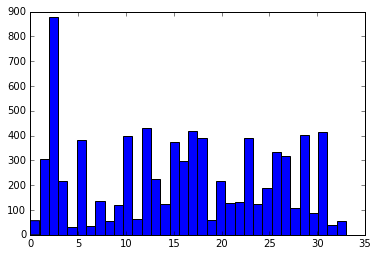

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

print "type of cancer:", np.unique(traingY)
plt.hist( traingY, 34)
plt.show()

- 암종류가 고루 분포가 되지 않아서 모델의 신뢰도는 낮을것으로 보여짐.
- 일단, 첫번째 시도이므로 그냥 진행해보자.

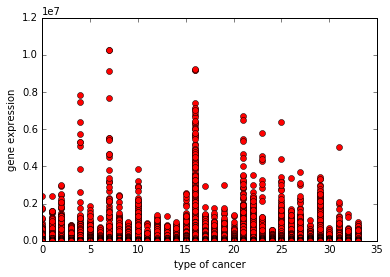

In [18]:
# 암 종류별 feaure들의 분포
plt.plot(traingY, traingX, 'ro')
plt.xlabel('type of cancer')
plt.ylabel('gene expression')
plt.show()

- 이상치가 존재하고, 이상치 제거 필요하지만 일단 그냥 진행~~~

## X 변수들의 normalize

In [27]:
def normalize(v):
    norm=np.linalg.norm(v)
    if norm==0: 
        return v
    return v/norm

In [28]:
normTestX = normalize( testX )

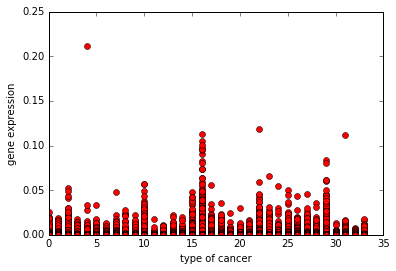

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(testY, normTestX, 'ro')
plt.xlabel('type of cancer')
plt.ylabel('gene expression')
plt.show()

## 학습용 데이터로 변환

In [7]:
def dense_to_one_hot(labels_dense, num_classes):
    """Convert class labels from scalars to one-hot vectors."""
    num_labels = labels_dense.shape[0]
    index_offset = np.arange(num_labels) * num_classes
    labels_one_hot = np.zeros((num_labels, num_classes))
    labels_one_hot.flat[index_offset + labels_dense.ravel()] = 1
    return labels_one_hot

In [8]:
traingY = dense_to_one_hot(traingY , 34  )

In [9]:
testY = dense_to_one_hot(testY , 34  )

## 모형 훈련시키기

In [10]:
def mini_batch( x, y, index, batch_size) : 
    miniX =  x[index * batch_size: (index + 1) * batch_size]
    miniY =  y[index * batch_size: (index + 1) * batch_size]
    return miniX, miniY

In [11]:
mini_batch( traingX, traingY, 0 , 5 )

(array([[  6.51879000e+01,   0.00000000e+00,   8.17000000e-01, ...,
           1.80718950e+03,   1.55229000e+01,   0.00000000e+00],
        [  1.10396900e+02,   0.00000000e+00,   2.09220000e+00, ...,
           9.63975200e+02,   5.51814000e+01,   0.00000000e+00],
        [  3.10196000e+01,   0.00000000e+00,   1.24340000e+00, ...,
           1.05564190e+03,   3.53745700e+02,   0.00000000e+00],
        [  1.96114400e+02,   5.17700000e-01,   5.17700000e-01, ...,
           9.87715700e+02,   6.21205000e+01,   0.00000000e+00],
        [  2.11381500e+02,   0.00000000e+00,   0.00000000e+00, ...,
           3.83244200e+02,   4.45630000e+00,   0.00000000e+00]]),
 array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

In [12]:
#-*- coding: utf-8 -*-

nX = 20502
nY = 34
batch_size = 500
training_epochs = 10
display_step = 5

# minibatches 횟수를 계산
n_train_batches = int( traingX.shape[0] / batch_size)

import tensorflow as tf

x = tf.placeholder(tf.float32, [None, nX])
W = tf.Variable(tf.zeros([nX, nY]))
b = tf.Variable(tf.zeros([nY]))

y = tf.nn.softmax(tf.matmul(x, W) + b)  #  y = W * x + b, 예측값
y_ = tf.placeholder(tf.float32, [None, nY]) # 실제값 저장용

cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))  # 손실함수 
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)            # 최적화 함수

# 변수의 초기화
init = tf.initialize_all_variables()
with tf.Session() as sess:
    sess.run(init)
    # mini배치 사이즈를 batch_size으로 해서 training_epochs번 반복해서 학습함.
    for epoch  in range(training_epochs):
        avg_cost = 0.
        for minibatch_index in range(n_train_batches):
            batch_xs, batch_ys = mini_batch( traingX, traingY, minibatch_index , batch_size )        
            sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
            avg_cost += ( sess.run( cross_entropy, feed_dict={x: batch_xs, y_ : batch_ys} ) / n_train_batches )
            
        # Display logs per epoch step
        if epoch % display_step == 0:
            print "Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(avg_cost)

    print "Optimization Finished!"      
    
    ## 모델 평가
    # 예측값과 실제값이 차이 여부를 확인하는 함수 정의
    correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
    # 정확도 계산하는 함수 정의
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))        
    print "Accuracy:",  sess.run(accuracy, feed_dict={x: testX, y_: testY})     

Epoch: 0001 cost= nan
Epoch: 0006 cost= nan
Optimization Finished!
Accuracy: 0.00655152
